In [ ]:
# cesar Cipher program 

import pyperclip
#http://invpy.com/pyperclip.py

option=int(input('''
    Ingrese option:
      1. Enc
      2. Dec\n
      '''))
if option==1: messageEncrypt =str(input ('ingrese datos (enc) [+] -> ')).upper()
else : messageDecrypt =str(input ('ingrese datos (dec) [+] -> '))

translated=''
LETTERS='!"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`a bcdefghijklmnopqrstuvwxyz{|}~'
key = int(input('Ingrese valor llave [+] -> max %s'%len(LETTERS)))

if option==1 : mess=messageEncrypt
elif option==2 : mess=messageDecrypt  
    
for char in mess:
    if char in LETTERS:
        num = LETTERS.find(char) #get the index of letter
        if option==1 : num+=key
        elif option==2 :  num-=key  
        # LETTERS or less than 0
        if num >= len(LETTERS): num = num - len(LETTERS)
        elif num < 0: num = num + len(LETTERS)
        translated +=LETTERS[num] # add encrypted/decrypted number's symbol at the end of translated
    else:
        translated+=char
        
print(mess,translated,sep='\n')
pyperclip.copy(translated)


In [ ]:
#Desencriptar mensage usando Fuerza bruta 

#   mensaje ->    j\njexZedx`d]ehcXZ`edxckoxlXb`eiXxHIPONLKPOL


data=str(input('Ingrese datos -> '))

def bruteForce(data:str):
    LETTERS='!"#$%&\'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`a bcdefghijklmnopqrstuvwxyz{|}~'
    lista= len(LETTERS)
    for posibility in range(lista):
        translated=''
        for position in data:
            if position in LETTERS:
                num = LETTERS.find(position) #get the index of letter
                num-=posibility  
                # LETTERS or less than 0
                if num < 0: num = num + len(LETTERS)
                translated +=LETTERS[num] # add encrypted/decrypted number's symbol at the end of translated
            else:
                translated+=position
        print('Clave %s - Valor: %s'%(posibility, translated),end=' \n\n')
        
bruteForce(data)




mensaje : Common sense is not so common.

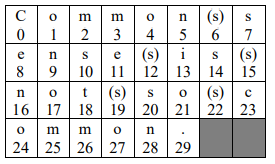

Transponemos las letras por cada colummna en este caso de 8

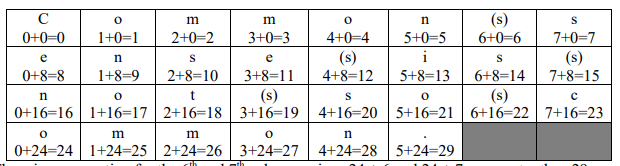

In [35]:
#transposition

def main():
    message='Common sense is not so common.'
    message = str(input('Ingrese datos -> '))
    key=8
    key=int(input('Ingrese Key -> '))
    text = encryptMessage(message, key)
    print(text+'|')
    
def encryptMessage(message,key):
    ciphertext=['']*key
    # Loop through each column in ciphertext.
    for col in range(key):
        # 1 - 8 
        pointer = col 
        
        while pointer< len(message): 
            
            #agregamos datos a la lista 
            ciphertext[col]+=message[pointer]
            
            pointer+=key #sumamos 0 + n, 8 + n, 16 + n, and 24 + n ..... 
    return ''.join(ciphertext)

if __name__=='__main__':
    main()

Twee  hit t hinnwkat yhiencciet toen gerty dou sf  yh de  ktoswp 8ocwueeleatt.erhsyalnseh syee dot deW pn 9?|


The steps for decrypting are:
1. Calculate the number of columns you will have by taking the length of the message and
dividing by the key, then rounding up.
2. Draw out a number of boxes. The number of columns was calculated in step 1. The
number of rows is the same as the key.
3. Calculate the number of boxes to shade in by taking the number of boxes (this is the
number of rows and columns multiplied) and subtracting the length of the ciphertext
message.
4. Shade in the number of boxes you calculated in step 3 at the bottom of the rightmost
column.
5. Fill in the characters of the ciphertext starting at the top row and going from left to right.
Skip any of the shaded boxes.
6. Get the plaintext by reading from the leftmost column going from top to bottom, and
moving over to the top of the next column.

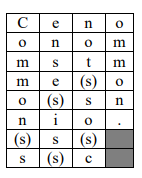

In [ ]:
#DECRYPTING WITH THE TRANSPOSITION CIPHER
# transpositionDecrypt

import math

def main():
    data = str(input("Ingrese datos -> "))
    key= int(input('Ingrese key ->'))
    text=fn(data, key)
    print(data,text+'|',sep='\n')

def fn(message, key):
    # The transposition decrypt function will simulate the "columns" and
    # "rows" of the grid that the plaintext is written on by using a list
    # of strings. First, we need to calculate a few values.

    # The number of "columns" in our transposition grid:
    numOfColumns = math.ceil(len(message) / key) 
    # The number of "rows" in our grid will need:
    numOfRows = key
    # The number of "shaded boxes" in the last "column" of the grid:
    numOfShadedBoxes = (numOfColumns * numOfRows) - len(message)
    
    plaintext = [''] * numOfColumns
    
    # The col and row variables point to where in the grid the next
    # character in the encrypted message will go.
    
    col=0
    row=0
    
    for symbol in message:
        plaintext[col]+=symbol
        col+=1 #point to next column
        
        # If there are no more columns OR we're at a shaded box, go back to
        # the first column and the next row.
        if (col == numOfColumns) or (col == numOfColumns - 1 and row >=numOfRows - numOfShadedBoxes):
            col=0
            row+=1
    return ''.join(plaintext)        
        
        
if __name__=='__main__':
    main() 

In [ ]:
#transpositionTest.py

import random, sys
from transpositionDecrypt import fn 
from transpositionEncrypt import encryptMessage

def main():
    random.seed(42)
    
    for i in range(20):
        # The message will have a random length:
        message= 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' * random.randint(4, 40)
        # Convert the message string to a list to shuffle it.
        message= list(message)
        random.shuffle(message)
        message=''.join(message) # convert list to string
        
        print('Test #%s: "%s..."'%(i+1,message[:50]))
        
        # Check all possible keys for each message.
        for key in range (1, len(message)):
            encrypted =encryptMessage(message, key)
            decrypted =fn(encrypted, key)
            # If the decryption doesn't match the original message, display an error message and quit.
            if message != decrypted:
                print('Mismatch with key %s and message %s'%(key, message))
                print(decrypted)
                sys.exit()
    print('Transposition cipher test passed')
    
if __name__=='__main__':
    main()